# CEMC格点数据平台

CEMC 格点数据平台 (GODAS) 是 CEMC 研发的数值模式格点数据检索与访问平台，对接 CMA 二级存储，支持对长时间序列数据的访问。

## 安装

godas-client 正在开发中，暂不提供安装地址，可以在预配置环境中使用。

如需安装请联系 cemc-oper 小组。

## 准备

导入需要的包

In [1]:
import pandas as pd

from godas_client.format.grib2 import load_field

设置绘图的数据参数，使用 CMA-GFS 2024 年 4 月 1 日 00 时次 024 时效数据。

In [2]:
system_name = "CMA-GFS"
start_time = pd.to_datetime("2024-04-01 00:00:00")
forecast_time = pd.to_timedelta("24h")

data_type = "cma_gfs"

## 加载数据

加载 2 米温度场

In [9]:
t_2m_field = load_field(
    system="cma_gfs",
    start_time="2024040100",
    parameter="TMP",
    forecast_time=forecast_time,
    level_type="heightAboveGround",
    level=2,
) - 273.15
t_2m_field

http://10.40.139.28:8000/enolhgfrusatzcyd.grib2
200
plguryvdcxknmhbi


<xarray.DataArray '2t' (latitude: 1440, longitude: 2880)> Size: 33MB
array([[-26.00337891, -23.63337891, -23.66337891, ..., -23.67337891,
        -23.68337891, -23.63337891],
       [-25.83337891, -23.00337891, -22.98337891, ..., -23.00337891,
        -22.99337891, -23.00337891],
       [-25.72337891, -23.02337891, -23.02337891, ..., -23.01337891,
        -23.02337891, -23.02337891],
       ...,
       [-45.26337891, -44.88337891, -44.63337891, ..., -44.93337891,
        -44.75337891, -44.96337891],
       [-45.32337891, -45.26337891, -45.09337891, ..., -45.02337891,
        -45.17337891, -45.34337891],
       [-45.82337891, -46.24337891, -46.57337891, ..., -46.25337891,
        -46.22337891, -46.06337891]])
Coordinates:
    time               datetime64[ns] 8B 2024-04-01
    step               timedelta64[ns] 8B 1 days
    valid_time         datetime64[ns] 8B 2024-04-02
    heightAboveGround  int64 8B 2
  * latitude           (latitude) float64 12kB 89.94 89.81 ... -89.81 -89.94
  * longitude          (longitude) float64 23kB 0.0 0.125 0.25 ... 359.8 359.9

## 绘图

使用 cedarkit-maps 绘制 2 米温度填充图

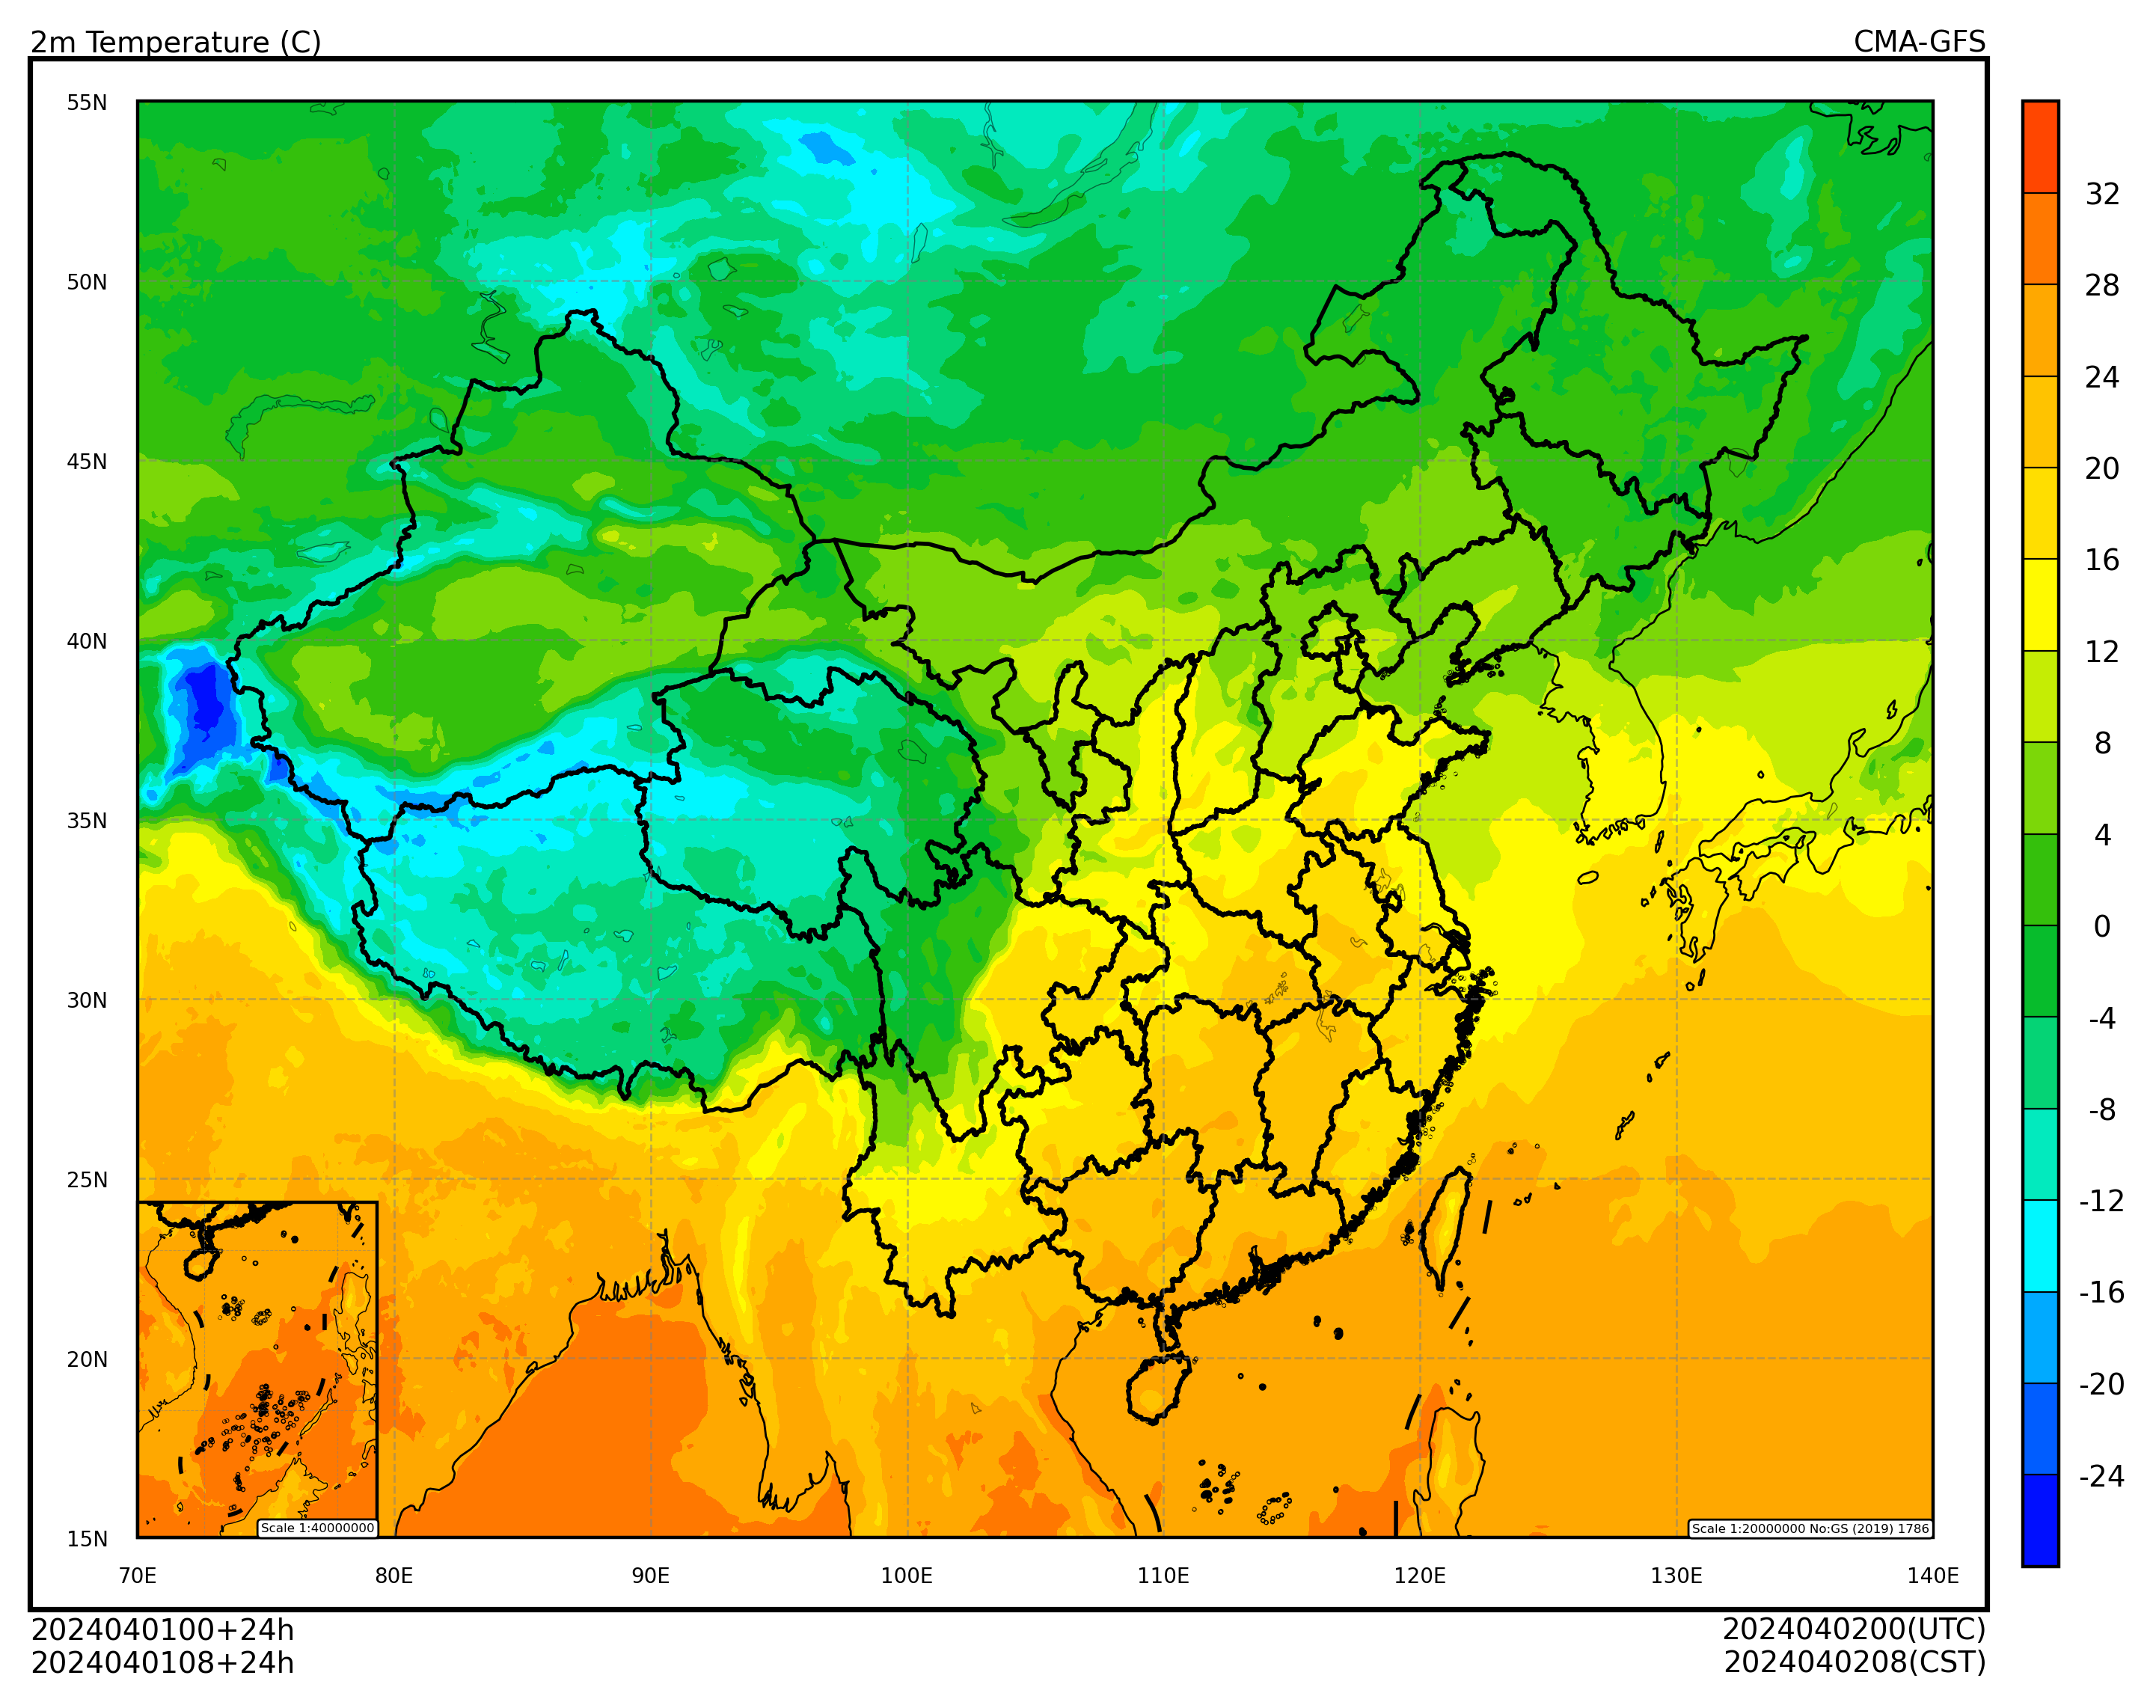

In [10]:
from cedarkit.maps.style import ContourStyle
from cedarkit.maps.chart import Panel
from cedarkit.maps.domains import EastAsiaMapDomain
from cedarkit.maps.colormap import get_ncl_colormap

t_2m_level = [-24, -20, -16, -12, -8, -4, 0, 4, 8, 12, 16, 20, 24, 28, 32]
color_index = [2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142, 152]
t_2m_color_map = get_ncl_colormap("BlAqGrYeOrReVi200", index=color_index)
t_2m_style = ContourStyle(
    colors=t_2m_color_map,
    levels=t_2m_level,
    fill=True,
)
domain = EastAsiaMapDomain()
panel = Panel(domain=domain)
panel.plot(t_2m_field, style=t_2m_style)
domain.set_title(
    panel=panel,
    graph_name="2m Temperature (C)",
    system_name=system_name,
    start_time=start_time,
    forecast_time=forecast_time,
)
domain.add_colorbar(panel=panel, style=t_2m_style)
panel.show()